In [4]:
import matplotlib
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [5]:
audio_file="uploads/simpleLoop.wav"
x,sr=librosa.load(audio_file, sr=22050)


In [7]:
def waveform():
    x,sr=librosa.load(audio_file, sr=22050)    # This returns an audio time series as a numpy array with 
                                           # a default sampling rate(sr) of 22KHZ mono. 'x' is audio time series. The sample rate 
                                           # is the number of samples of audio carried per second, measured in Hz or kHz.

    print(type(x),type(sr))                    # o/p-> <class 'numpy.ndarray'> <class 'int'>

    print(x.shape,sr)                          # o/p-> (235200,) 22050

    return librosa.display.waveplot(x, sr=sr) 
    
   

<class 'numpy.ndarray'> <class 'int'>
(66150,) 22050


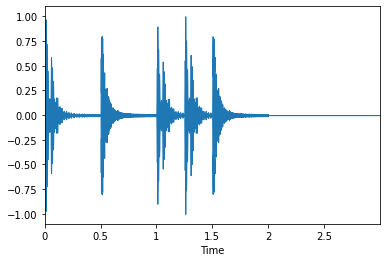

In [9]:
fig=waveform()

In [10]:
type(fig)

matplotlib.collections.PolyCollection

In [11]:
def spectrum(audio_file="uploads/simpleLoop.wav"): 
    x,sr=librosa.load(audio_file, sr=22050)
    fft=np.fft.fft(x)      # this gives complex values and so we need to convert it to absolute values.
     

    magnitude=np.abs(fft)  # here we are performing absolute value on the complex value and we end up at this magnitude 
                       # and this magnitude indicate the contribution of each frequency been to the overall sound

    frequency=np.linspace(0,sr,len(magnitude)) # np.linspace return evenly spaced numbers over a specified interval.
                                           # numpy.linspace(start, stop, num=50) here start=0, stop=sr and the 
                                           # number of evenly spaced=length of magnitude.

    # we need not to plot whole frequency vs magnitude graph as it would be symetric
    #  hence we only need to plot first half of frequency and first half of magnitude

    left_frequency=frequency[:int(len(frequency)/2)]  # ploting only first half of frequency
    left_magnitude=magnitude[:int(len(magnitude)/2)]  # ploting only first half of magnitude

    return plt.plot(left_frequency,left_magnitude)
    #plt.title("Spectrum") 
    #plt.xlabel("Frequency")
    #plt.ylabel("Magnitude")
    #plt.show()


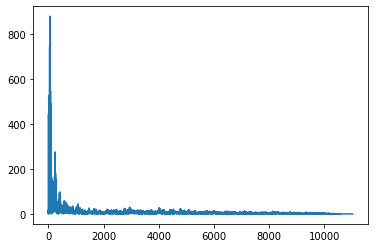

In [12]:
f=spectrum()

In [11]:
def mfcc(audio_file="uploads/simpleLoop.wav"):
    x,sr=librosa.load(audio_file, sr=22050)
    mfcc=librosa.feature.mfcc(x,n_fft=2048,hop_length=512,n_mfcc=13)
    return librosa.display.specshow(mfcc,sr=sr, hop_length=512,x_axis='time')

   # print(mfcc.shape)  # o/p-> (13, 460) this means that here mfcc computed 13 MFCCs over 460 frames.

    #plt.title("MFCCs") 
    #plt.xlabel("Time")
    #plt.ylabel("MFCCs")
    #plt.colorbar()
   # plt.show()

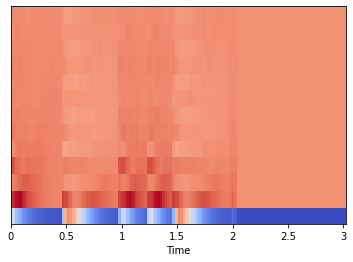

In [12]:
m=mfcc()